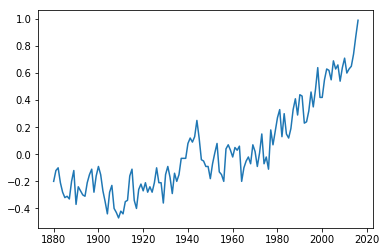

In [2]:

import pandas as pd
import matplotlib
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas import DataFrame

data = pd.read_csv('global_temp.csv')
data2 = pd.read_csv('global_temp.csv')

data.set_index('Year', inplace=True)
data.index

#convert to time series:
ts = data['Mean']

plt.plot(ts)

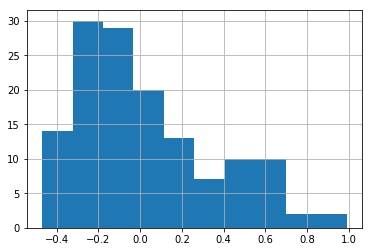

In [3]:

data2.describe()
data2['Mean'].hist(bins=10)



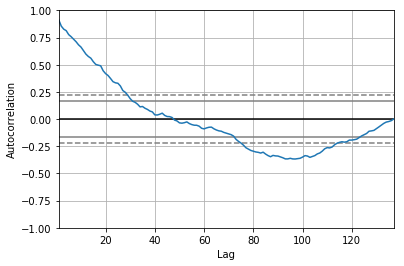

In [5]:
from pandas.plotting import autocorrelation_plot
 
series = pd.read_csv('global_temp.csv',index_col=0,header=0)
autocorrelation_plot(series)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Mean   No. Observations:                  136
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 123.148
Method:                       css-mle   S.D. of innovations              0.098
Date:                Sun, 23 Jun 2019   AIC                           -232.297
Time:                        21:59:10   BIC                           -211.908
Sample:                             1   HQIC                          -224.011
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0078      0.004     -1.913      0.058      -0.016       0.000
ar.L1.D.Mean    -0.3090      0.085     -3.616      0.000      -0.476      -0.142
ar.L2.D.Mean    -0.3370      0.091     -3.71

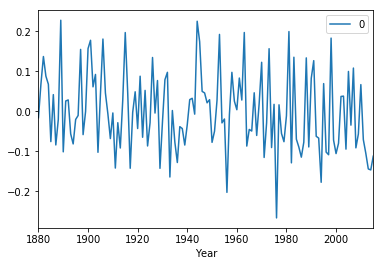

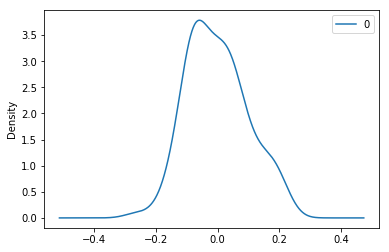

                0
count  136.000000
mean    -0.001566
std      0.098294
min     -0.266411
25%     -0.077144
50%     -0.009514
75%      0.062361
max      0.227300


In [6]:

series = pd.read_csv('global_temp.csv',index_col=0,header=0)
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

predicted=-0.083061, expected=-0.020000
predicted=0.031489, expected=-0.110000
predicted=-0.050850, expected=0.180000
predicted=0.088973, expected=0.070000
predicted=0.073534, expected=0.170000
predicted=0.065061, expected=0.270000
predicted=0.264514, expected=0.330000
predicted=0.213082, expected=0.130000
predicted=0.164394, expected=0.300000
predicted=0.289240, expected=0.150000
predicted=0.199648, expected=0.120000
predicted=0.117560, expected=0.190000
predicted=0.271673, expected=0.330000
predicted=0.244911, expected=0.410000
predicted=0.357760, expected=0.290000
predicted=0.269100, expected=0.440000
predicted=0.406277, expected=0.430000
predicted=0.408736, expected=0.230000
predicted=0.246872, expected=0.240000
predicted=0.340619, expected=0.320000
predicted=0.329778, expected=0.460000
predicted=0.401461, expected=0.350000
predicted=0.359409, expected=0.480000
predicted=0.441175, expected=0.640000
predicted=0.579337, expected=0.420000
predicted=0.379889, expected=0.420000
predicte

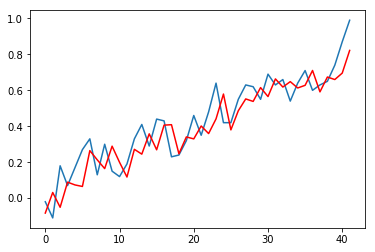

In [7]:
#MA Model
series = pd.read_csv('global_temp.csv',index_col=0,header=0)
series = series.sort_index(ascending=True, axis=0)
X = series.values
size = int(len(X) * 0.7)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()


In [ ]:
model = ARIMA(history, order=(5,1,0))
forecast = model_fit.forecast(steps=100)[0]
plt.plot(forecast)
